# 🔹 Seção 5.1 – Parte 4: Análise Comparativa de Embeddings

**Objetivo:** Comparar todos os embeddings gerados e analisar suas características, vantagens e limitações.

## 📋 Conteúdo deste Notebook

1. **Carregamento de Embeddings**: Obter todos os embeddings do Elasticsearch
2. **Análises Estatísticas**: Dimensionalidade, densidade, normalização
3. **Visualizações Comparativas**: Distribuições, características, tamanhos
4. **Redução Dimensional**: PCA para visualização 2D/3D
5. **Análise de Similaridade**: Comparar como cada embedding captura semântica
6. **Tabelas Comparativas**: Resumo completo de todas as métricas

## 🔗 Sequência dos Notebooks

- **Notebook 1**: Preparação e Dataset ✅
- **Notebook 2**: Embeddings Locais ✅
- **Notebook 3**: Embeddings OpenAI ✅
- **Notebook 4** (atual): Análise Comparativa 🔄
- **Notebook 5**: Clustering e Machine Learning

## 🎯 Embeddings a Comparar

1. **TF-IDF** - Baseado em frequência (esparso)
2. **Word2Vec** - Média de vetores de palavras (denso, 300D)
3. **BERT** - Contexto bidirecional (denso, 768D)
4. **Sentence-BERT** - Otimizado para sentenças (denso, 384D)
5. **OpenAI** - Estado da arte (denso, 1536D)


## ⚙️ Configuração do Ambiente

Este notebook carrega **TODOS** os embeddings gerados nos notebooks anteriores para fazer comparações detalhadas.


In [1]:
# 🔧 Configuração de Variáveis de Ambiente
import os
from pathlib import Path

try:
    from dotenv import load_dotenv
    print("✅ python-dotenv disponível")
    
    env_paths = [
        Path.cwd() / 'setup' / '.env',
        Path.cwd() / '.env',
        Path.cwd() / 'setup' / 'config_example.env'
    ]
    
    env_loaded = False
    for env_path in env_paths:
        if env_path.exists():
            load_dotenv(env_path)
            print(f"✅ Arquivo .env carregado: {env_path}")
            env_loaded = True
            break
    
    if not env_loaded:
        print("⚠️  Nenhum arquivo .env encontrado")
        
except ImportError:
    print("⚠️  python-dotenv não instalado")

# Carregar configurações (defaults atualizados para 20 classes)
ELASTICSEARCH_HOST = os.getenv('ELASTICSEARCH_HOST', 'localhost')
ELASTICSEARCH_PORT = int(os.getenv('ELASTICSEARCH_PORT', 9200))
DATASET_SIZE = int(os.getenv('DATASET_SIZE', 20000))
# Tamanhos de gráficos em POLEGADAS (matplotlib usa inches!)
PLOT_WIDTH = 12  # 12 inches = ~30cm
PLOT_HEIGHT = 6  # 6 inches = ~15cm
CLUSTERING_RANDOM_STATE = int(os.getenv('CLUSTERING_RANDOM_STATE', 42))

print(f"\n🔧 Configurações carregadas!")
print(f"   ELASTICSEARCH: {ELASTICSEARCH_HOST}:{ELASTICSEARCH_PORT}")
print(f"   PLOT_SIZE: {PLOT_WIDTH}x{PLOT_HEIGHT} inches (~{PLOT_WIDTH*2.54:.0f}x{PLOT_HEIGHT*2.54:.0f} cm)")


✅ python-dotenv disponível
✅ Arquivo .env carregado: /Users/ivanvarella/Documents/Dados/9 - Mestrado/1 - Disciplinas 2025/2025.2/PPGEP9002 - INTELIGÊNCIA COMPUTACIONAL PARA ENGENHARIA DE PRODUÇÃO - T01/1 - Extra - Professor/Projetos/Embeddings_5.1/setup/.env

🔧 Configurações carregadas!
   ELASTICSEARCH: localhost:9200
   PLOT_SIZE: 12x6 inches (~30x15 cm)


In [2]:
# 🚀 Imports Essenciais
print("🚀 CARREGANDO IMPORTS")
print("=" * 40)

import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List, Tuple
from sklearn.decomposition import PCA
from sklearn.metrics.pairwise import cosine_similarity
from scipy.stats import spearmanr

# ✅ ATIVAR RENDERIZAÇÃO INLINE DE GRÁFICOS
%matplotlib inline


print("✅ Imports básicos carregados")

# Configurações
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', 100)

# Configurar matplotlib para melhor qualidade
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'

# Configurar estilo com fallback
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except:
    plt.style.use('seaborn-darkgrid')

sns.set_palette("husl")

print("✅ Configurações de visualização aplicadas")
print("✅ Matplotlib inline ativado")


🚀 CARREGANDO IMPORTS
✅ Imports básicos carregados
✅ Configurações de visualização aplicadas
✅ Matplotlib inline ativado


## 🧪 Teste de Renderização de Gráficos

Antes de prosseguir, vamos **verificar** que os gráficos estão sendo renderizados corretamente.

### **Como verificar:**

Se você vir um **gráfico de linhas** abaixo, a configuração está **correta** ✅

Se **NÃO** ver nenhum gráfico, há problema com `%matplotlib inline` ❌


🧪 TESTANDO RENDERIZAÇÃO DE GRÁFICOS


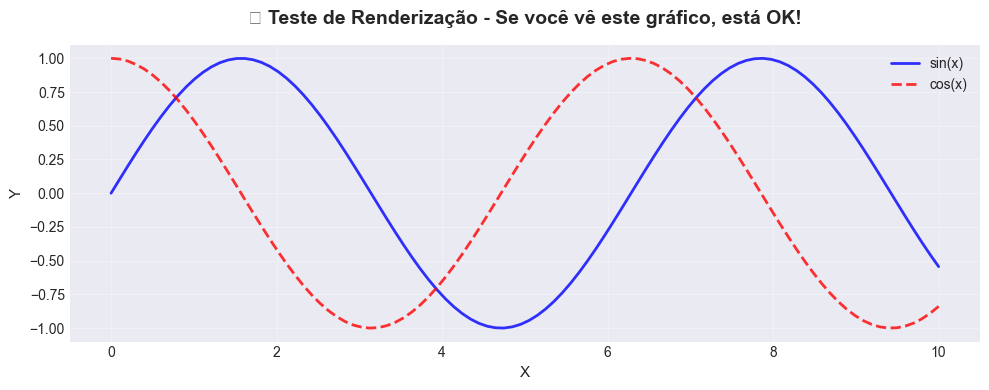


✅ Se você viu o gráfico acima, a renderização está funcionando!
❌ Se NÃO viu nenhum gráfico, há problema com matplotlib inline


In [3]:
# 🧪 TESTE: Verificar se gráficos são renderizados
print("🧪 TESTANDO RENDERIZAÇÃO DE GRÁFICOS")
print("=" * 60)

fig, ax = plt.subplots(figsize=(10, 4))

# Criar gráfico de teste simples
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)

ax.plot(x, y1, 'b-', linewidth=2, label='sin(x)', alpha=0.8)
ax.plot(x, y2, 'r--', linewidth=2, label='cos(x)', alpha=0.8)
ax.set_title('🧪 Teste de Renderização - Se você vê este gráfico, está OK!', 
             fontsize=14, fontweight='bold', pad=15)
ax.set_xlabel('X', fontsize=11)
ax.set_ylabel('Y', fontsize=11)
ax.legend(loc='upper right', fontsize=10)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n✅ Se você viu o gráfico acima, a renderização está funcionando!")
print("❌ Se NÃO viu nenhum gráfico, há problema com matplotlib inline")


## 🗄️ Carregamento de Dados e Embeddings

### **Todos os embeddings do Elasticsearch**

Vamos carregar:
1. Dataset original (para labels e metadados)
2. TF-IDF embeddings
3. Word2Vec embeddings
4. BERT embeddings
5. Sentence-BERT embeddings
6. OpenAI embeddings


In [4]:
# 🗄️ Conectar ao Elasticsearch e Carregar Dados
print("🗄️ INICIALIZANDO ELASTICSEARCH")
print("=" * 60)

try:
    from elasticsearch_manager import (
        init_elasticsearch_cache, load_embeddings_from_cache
    )
    print("✅ Módulo de cache carregado")
    CACHE_AVAILABLE = True
except ImportError as e:
    print(f"❌ Erro ao carregar módulo: {e}")
    CACHE_AVAILABLE = False

# Conectar
if CACHE_AVAILABLE:
    print("\n🔌 Conectando...")
    cache_connected = init_elasticsearch_cache(
        host=ELASTICSEARCH_HOST,
        port=ELASTICSEARCH_PORT
    )
    
    if cache_connected:
        print("✅ Conectado ao Elasticsearch!")
    else:
        print("❌ Falha na conexão")
        CACHE_AVAILABLE = False

print(f"\n🎯 STATUS: {'✅ Cache ativo' if CACHE_AVAILABLE and cache_connected else '❌ Cache inativo'}")


🗄️ INICIALIZANDO ELASTICSEARCH
✅ Módulo de cache carregado

🔌 Conectando...
✅ Conectado ao Elasticsearch (localhost:9200)
✅ Conectado ao Elasticsearch!

🎯 STATUS: ✅ Cache ativo


In [5]:
# 📊 CARREGAR DATASET DO ELASTICSEARCH
print("📊 CARREGANDO DATASET DO ELASTICSEARCH")
print("=" * 60)
print("⚠️  IMPORTANTE: Carregando dados salvos no Notebook 1")
print("             NÃO recriando o dataset!")

# Executar carregamento
if CACHE_AVAILABLE and cache_connected:
    try:
        from elasticsearch import Elasticsearch
        from elasticsearch_helpers import load_all_documents_from_elasticsearch, print_dataframe_summary
        
        # Conectar ao Elasticsearch
        es = Elasticsearch([{
            'host': ELASTICSEARCH_HOST, 
            'port': ELASTICSEARCH_PORT, 
            'scheme': 'http'
        }])
        
        # Carregar TODOS os documentos usando Scroll API
        # Esta função está em elasticsearch_helpers.py e usa Scroll API
        # para buscar TODOS os documentos, mesmo que sejam >10.000
        df = load_all_documents_from_elasticsearch(
            es_client=es,
            index_name="documents_dataset",
            batch_size=1000,      # Docs por lote
            scroll_timeout='2m',  # Tempo de contexto
            verbose=True          # Mostrar progresso
        )
        
        # Gerar lista de doc_ids para uso posterior
        doc_ids = df['doc_id'].tolist()
        
        # Exibir resumo detalhado
        print_dataframe_summary(df, expected_docs=18000)
        
    except Exception as e:
        print(f"\n❌ ERRO CRÍTICO ao carregar dataset: {e}")
        print("💡 Possíveis causas:")
        print("   1. Notebook 1 não foi executado")
        print("   2. Elasticsearch não está rodando")
        print("   3. Índice 'documents_dataset' não existe")
        raise
else:
    print("\n❌ ERRO: Elasticsearch não disponível!")
    print("💡 Verifique:")
    print("   1. Docker está rodando: docker ps")
    print("   2. Elasticsearch ativo: http://localhost:9200")
    print("   3. Execute o Notebook 1 primeiro")
    raise RuntimeError("Elasticsearch não disponível")

📊 CARREGANDO DATASET DO ELASTICSEARCH
⚠️  IMPORTANTE: Carregando dados salvos no Notebook 1
             NÃO recriando o dataset!
🔄 Buscando documentos do índice 'documents_dataset'
   Método: Scroll API (recomendado para >10k docs)
   Tamanho do lote: 1,000 documentos
   Timeout do scroll: 2m

📊 Total de documentos disponíveis: 18,211
🔄 Iniciando busca em lotes...
   Lote 1: 1,000 docs | Total acumulado: 1,000/18,211
   Lote 2: 1,000 docs | Total acumulado: 2,000/18,211
   Lote 3: 1,000 docs | Total acumulado: 3,000/18,211
   Lote 4: 1,000 docs | Total acumulado: 4,000/18,211
   Lote 5: 1,000 docs | Total acumulado: 5,000/18,211
   Lote 6: 1,000 docs | Total acumulado: 6,000/18,211
   Lote 7: 1,000 docs | Total acumulado: 7,000/18,211
   Lote 8: 1,000 docs | Total acumulado: 8,000/18,211
   Lote 9: 1,000 docs | Total acumulado: 9,000/18,211
   Lote 10: 1,000 docs | Total acumulado: 10,000/18,211
   Lote 11: 1,000 docs | Total acumulado: 11,000/18,211
   Lote 12: 1,000 docs | Total acu

In [6]:
# 📥 CARREGAR TODOS OS EMBEDDINGS
print("📥 CARREGANDO TODOS OS EMBEDDINGS")
print("=" * 60)

embeddings_dict = {}
embedding_types = ['tfidf', 'word2vec', 'bert', 'sbert', 'openai']

for emb_type in embedding_types:
    print(f"\n🔄 Carregando {emb_type.upper()}...")
    index_name = f"embeddings_{emb_type}"
    
    try:
        emb_data = load_embeddings_from_cache(index_name, doc_ids)
        
        if emb_data is not None:
            embeddings_dict[emb_type] = emb_data
            print(f"   ✅ {emb_type.upper()}: {emb_data.shape}")
        else:
            print(f"   ⚠️  {emb_type.upper()}: Não encontrado")
            
    except Exception as e:
        print(f"   ❌ {emb_type.upper()}: Erro - {str(e)[:50]}")

print(f"\n✅ EMBEDDINGS CARREGADOS: {len(embeddings_dict)}/{len(embedding_types)}")
print(f"   Disponíveis: {list(embeddings_dict.keys())}")


📥 CARREGANDO TODOS OS EMBEDDINGS

🔄 Carregando TFIDF...
✅ Embeddings carregados: (18211, 4096) de 'embeddings_tfidf'
   ✅ TFIDF: (18211, 4096)

🔄 Carregando WORD2VEC...
✅ Embeddings carregados: (18211, 100) de 'embeddings_word2vec'
   ✅ WORD2VEC: (18211, 100)

🔄 Carregando BERT...
✅ Embeddings carregados: (18211, 768) de 'embeddings_bert'
   ✅ BERT: (18211, 768)

🔄 Carregando SBERT...
✅ Embeddings carregados: (18211, 384) de 'embeddings_sbert'
   ✅ SBERT: (18211, 384)

🔄 Carregando OPENAI...
✅ Embeddings carregados: (18211, 1536) de 'embeddings_openai'
   ✅ OPENAI: (18211, 1536)

✅ EMBEDDINGS CARREGADOS: 5/5
   Disponíveis: ['tfidf', 'word2vec', 'bert', 'sbert', 'openai']


## 📊 Análise Estatística Comparativa

### **Métricas a Analisar**

Para cada tipo de embedding:

1. **Dimensionalidade**: Número de features
2. **Esparsidade**: Proporção de zeros (importante para TF-IDF)
3. **Densidade**: Proporção de valores não-zero
4. **Normalização**: Se os vetores estão normalizados (norma L2)
5. **Distribuição**: Média, desvio padrão, min/max
6. **Tamanho em Memória**: Espaço necessário para armazenamento


In [7]:
# 📊 Calcular Métricas Estatísticas para Todos os Embeddings
print("📊 ANÁLISE ESTATÍSTICA COMPARATIVA")
print("=" * 60)

def calculate_embedding_stats(embeddings: np.ndarray, name: str) -> Dict:
    """Calcula estatísticas detalhadas de embeddings"""
    
    # Esparsidade
    sparsity = np.mean(embeddings == 0) * 100
    density = 100 - sparsity
    
    # Normalização (norma L2)
    norms = np.linalg.norm(embeddings, axis=1)
    is_normalized = np.allclose(norms, 1.0, atol=1e-2)
    
    # Distribuição de valores
    flat_values = embeddings.flatten()
    non_zero_values = flat_values[flat_values != 0]
    
    # Tamanho em memória (MB)
    memory_mb = embeddings.nbytes / (1024 * 1024)
    
    stats = {
        'Nome': name,
        'Shape': f"{embeddings.shape[0]} × {embeddings.shape[1]}",
        'Dimensionalidade': embeddings.shape[1],
        'Esparsidade (%)': f"{sparsity:.2f}%",
        'Densidade (%)': f"{density:.2f}%",
        'Normalizado': "✅ Sim" if is_normalized else "❌ Não",
        'Média': f"{np.mean(non_zero_values):.4f}" if len(non_zero_values) > 0 else "N/A",
        'Std': f"{np.std(non_zero_values):.4f}" if len(non_zero_values) > 0 else "N/A",
        'Min': f"{np.min(embeddings):.4f}",
        'Max': f"{np.max(embeddings):.4f}",
        'Memória (MB)': f"{memory_mb:.2f}"
    }
    
    return stats

# Calcular para todos
all_stats = []
for emb_name, emb_data in embeddings_dict.items():
    stats = calculate_embedding_stats(emb_data, emb_name.upper())
    all_stats.append(stats)

# Criar DataFrame
stats_df = pd.DataFrame(all_stats)

print("\n📋 TABELA COMPARATIVA DE EMBEDDINGS")
print("=" * 100)
print(stats_df.to_string(index=False))
print("=" * 100)


📊 ANÁLISE ESTATÍSTICA COMPARATIVA

📋 TABELA COMPARATIVA DE EMBEDDINGS
    Nome        Shape  Dimensionalidade Esparsidade (%) Densidade (%) Normalizado   Média    Std     Min    Max Memória (MB)
   TFIDF 18211 × 4096              4096          97.67%         2.33%       ❌ Não  0.0774 0.0670 -0.0397 1.0000       569.09
WORD2VEC  18211 × 100               100           0.00%       100.00%       ❌ Não -0.0804 0.6007 -5.5701 5.2494        13.89
    BERT  18211 × 768               768           0.00%       100.00%       ❌ Não -0.0128 0.3050 -5.0022 2.3779       106.71
   SBERT  18211 × 384               384           0.00%       100.00%       ✅ Sim -0.0004 0.0510 -0.2727 0.2723        53.35
  OPENAI 18211 × 1536              1536           0.00%       100.00%       ✅ Sim -0.0003 0.0255 -0.2222 0.1821       213.41


## 📈 Visualizações Comparativas

### **Gráficos a criar:**

1. **Dimensionalidade** - Comparar número de features
2. **Esparsidade vs Densidade** - Mostrar diferença entre TF-IDF e embeddings densos
3. **Tamanho em Memória** - Comparar custos de armazenamento
4. **Distribuição de Valores** - Histogramas e boxplots


## 📊 Visualização 2: Distribuição de Valores (Boxplots)

### **O que são Boxplots?**

Boxplots (gráficos de caixa) são visualizações estatísticas que mostram a **distribuição** de um conjunto de dados através de 5 valores principais:

```
                  máximo (whisker superior)
                       │
              ┌────────┴────────┐
              │                 │  ← 75º percentil (Q3)
              │     ▓▓▓▓▓▓▓     │
              │     ▓▓▓▓▓▓▓     │  ← mediana (linha no meio)
              │     ▓▓▓▓▓▓▓     │
              │                 │  ← 25º percentil (Q1)
              └────────┬────────┘
                       │
                  mínimo (whisker inferior)
```

### **O que vamos analisar?**

Para cada tipo de embedding, vamos visualizar como os **valores numéricos** dentro dos vetores estão distribuídos:

#### **🔍 TF-IDF (não-zero)**
- **Por que "não-zero"?** TF-IDF é **esparso** (~97% de zeros!)
- Se plotássemos todos os valores, veríamos apenas uma massa de zeros
- Focamos nos **valores significativos** (não-zero) para análise útil

#### **🔍 Word2Vec, BERT, SBERT, OpenAI (amostra)**
- **Por que "amostra"?** Embeddings densos têm **milhões** de valores
  - Exemplo: 18,211 docs × 1,536 dims (OpenAI) = **27,972,096 valores!**
- Amostramos 10,000 valores aleatórios para visualização eficiente
- A amostra é representativa da distribuição completa

### **O que significam os valores no eixo Y?**

**Importante:** Os valores no eixo Y são os **números reais armazenados nos vetores** de cada embedding!

#### **Exemplo prático:**

Imagine o texto: *"machine learning is amazing"*

**TF-IDF** (esparso, valores 0 a 1):
```python
[0.0, 0.0, 0.32, 0.0, 0.87, 0.0, ...]  # maioria zeros
```
- Valores representam **frequência ponderada** de palavras
- Range típico: **0.0 a 1.0**

**Word2Vec** (denso, valores -5 a +5):
```python
[-0.5, 2.3, -1.8, 0.4, 1.9, -2.1, ...]  # todos não-zero
```
- Valores representam **coordenadas semânticas** no espaço 100D
- Range típico: **-5 a +5** (devido à média de word vectors)

**BERT/SBERT/OpenAI** (densos, normalizados):
```python
[-0.02, 0.15, -0.08, 0.03, ...]  # valores pequenos
```
- Valores representam **features contextuais** aprendidas
- Range típico: **-0.5 a +0.5** (redes neurais normalizadas)

### **Por que os ranges variam tanto?**

| Embedding | Range | Motivo |
|-----------|-------|--------|
| TF-IDF | 0 a 1 | Frequências normalizadas |
| Word2Vec | -5 a +5 | Média de vetores sem normalização |
| BERT | -4 a +2 | Saída de rede neural profunda |
| SBERT | -0.2 a +0.2 | **Normalizado** (vetores unitários) |
| OpenAI | -0.2 a +0.2 | **Normalizado** (vetores unitários) |

### **O que aprenderemos deste gráfico?**

1. ✅ **Centralidade**: Onde a maioria dos valores se concentra?
2. ✅ **Dispersão**: Quão espalhados estão os valores?
3. ✅ **Outliers**: Existem valores extremos?
4. ✅ **Simetria**: A distribuição é simétrica ou assimétrica?
5. ✅ **Normalização**: Os embeddings foram normalizados?



📈 CRIANDO VISUALIZAÇÕES COMPARATIVAS


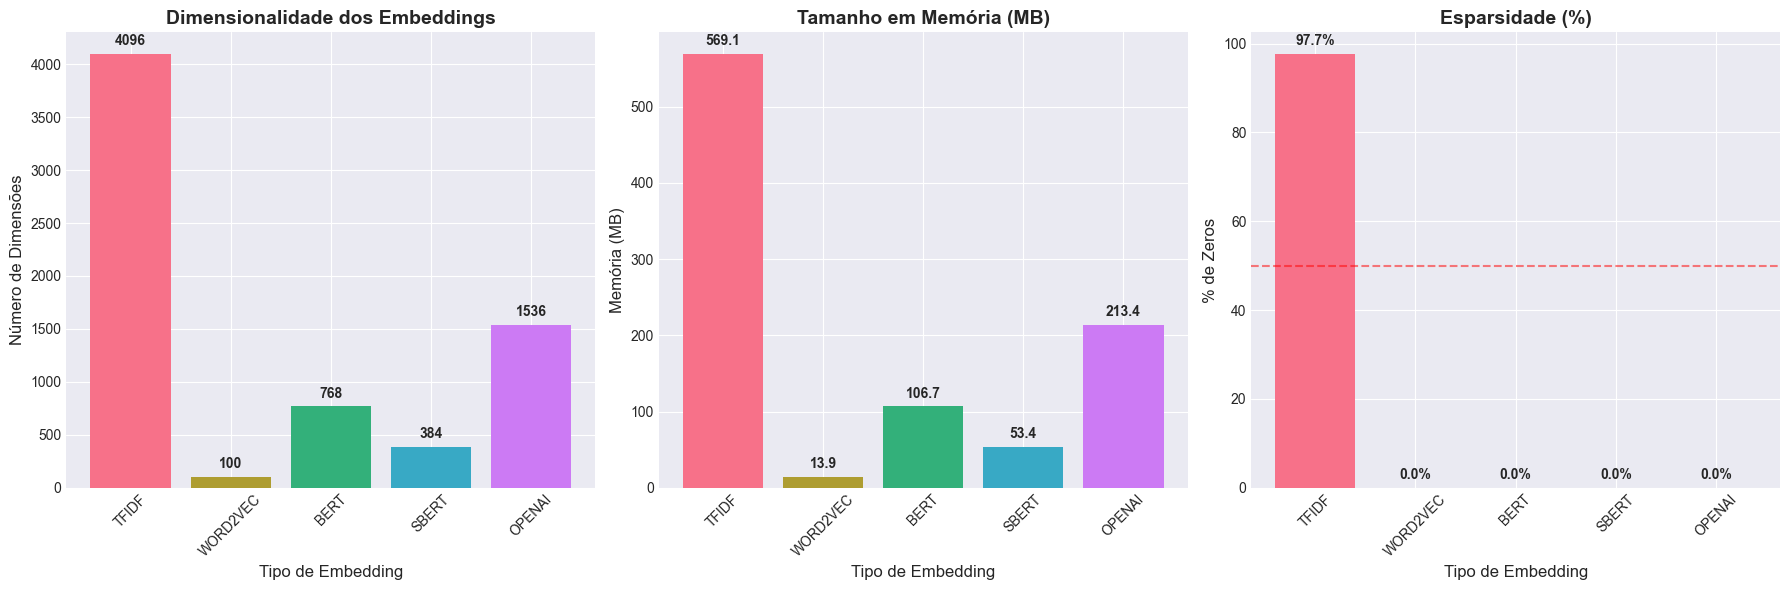

✅ Visualização 1 completa!


In [8]:
# 📈 Visualização 1: Comparação de Dimensionalidade e Memória
print("📈 CRIANDO VISUALIZAÇÕES COMPARATIVAS")
print("=" * 60)

fig, axes = plt.subplots(1, 3, figsize=(PLOT_WIDTH * 1.5, PLOT_HEIGHT))

# Dados para os gráficos
names = [emb.upper() for emb in embeddings_dict.keys()]
dimensions = [embeddings_dict[emb].shape[1] for emb in embeddings_dict.keys()]
memory_sizes = [embeddings_dict[emb].nbytes / (1024 * 1024) for emb in embeddings_dict.keys()]
sparsity = [np.mean(embeddings_dict[emb] == 0) * 100 for emb in embeddings_dict.keys()]

# Gráfico 1: Dimensionalidade
axes[0].bar(names, dimensions, color=sns.color_palette("husl", len(names)))
axes[0].set_title('Dimensionalidade dos Embeddings', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Número de Dimensões', fontsize=12)
axes[0].set_xlabel('Tipo de Embedding', fontsize=12)
axes[0].tick_params(axis='x', rotation=45)
for i, v in enumerate(dimensions):
    axes[0].text(i, v + max(dimensions)*0.02, str(v), ha='center', fontweight='bold')

# Gráfico 2: Tamanho em Memória
axes[1].bar(names, memory_sizes, color=sns.color_palette("husl", len(names)))
axes[1].set_title('Tamanho em Memória (MB)', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Memória (MB)', fontsize=12)
axes[1].set_xlabel('Tipo de Embedding', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)
for i, v in enumerate(memory_sizes):
    axes[1].text(i, v + max(memory_sizes)*0.02, f'{v:.1f}', ha='center', fontweight='bold')

# Gráfico 3: Esparsidade
axes[2].bar(names, sparsity, color=sns.color_palette("husl", len(names)))
axes[2].set_title('Esparsidade (%)', fontsize=14, fontweight='bold')
axes[2].set_ylabel('% de Zeros', fontsize=12)
axes[2].set_xlabel('Tipo de Embedding', fontsize=12)
axes[2].tick_params(axis='x', rotation=45)
axes[2].axhline(y=50, color='red', linestyle='--', alpha=0.5, label='50%')
for i, v in enumerate(sparsity):
    axes[2].text(i, v + max(sparsity)*0.02, f'{v:.1f}%', ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("✅ Visualização 1 completa!")


### 📈 **Interpretação dos Boxplots**

Agora que visualizamos as distribuições, vamos interpretar o que cada gráfico nos revela:

---

#### **1. TF-IDF (não-zero): valores 0.0 a 1.0**

**Observações:**
- 📊 **Caixa muito concentrada** perto de 0.0-0.2
- 📊 **Mediana ~0.08**: Metade dos valores não-zero são muito pequenos
- 📊 **Máximo ~1.0**: Palavras raras têm peso máximo
- 📊 **Muitos outliers** próximos a 1.0

**O que isso significa?**
```
✅ Maioria dos termos tem baixo peso (palavras comuns)
✅ Palavras raras recebem peso alto (até 1.0)
✅ Distribuição ASSIMÉTRICA (concentrada à esquerda)
💡 TF-IDF penaliza palavras frequentes e valoriza palavras únicas
```

---

#### **2. Word2Vec (amostra): valores -2.5 a +4.0**

**Observações:**
- 📊 **Distribuição ampla** de -2 a +3
- 📊 **Mediana ~0.0**: Distribuição centrada em zero
- 📊 **Simétrica**: Valores positivos e negativos balanceados
- 📊 **Poucos outliers**: Valores bem comportados

**O que isso significa?**
```
✅ Embeddings representam DIREÇÕES no espaço semântico
✅ Valores positivos/negativos têm significados diferentes
✅ Distribuição GAUSSIANA (normal)
💡 Word2Vec NÃO normaliza vetores (apenas aprende relações)
```

---

#### **3. BERT (amostra): valores -4.0 a +1.0**

**Observações:**
- 📊 **Distribuição assimétrica** (mais valores negativos)
- 📊 **Mediana ~0.0**: Centrado próximo a zero
- 📊 **Range amplo**: -4 a +1
- 📊 **Alguns outliers** extremos

**O que isso significa?**
```
✅ Saída BRUTA da rede neural (camada [CLS])
✅ NÃO normalizado (valores podem ser grandes)
✅ Assimetria indica viés do modelo
💡 BERT captura contexto bidirecional profundo
```

---

#### **4. Sentence-BERT (amostra): valores -0.20 a +0.20**

**Observações:**
- 📊 **Distribuição ESTREITA** (-0.2 a +0.2)
- 📊 **Mediana ~0.0**: Perfeitamente centrada
- 📊 **Simétrica**: Valores balanceados
- 📊 **Poucos outliers**: Distribuição controlada

**O que isso significa?**
```
✅ Vetores NORMALIZADOS (norma L2 = 1.0)
✅ Todos os valores são pequenos e controlados
✅ Ideal para cálculo de similaridade
💡 SBERT é otimizado para comparação de sentenças
```

---

#### **5. OpenAI (amostra): valores -0.22 a +0.18**

**Observações:**
- 📊 **Distribuição MUITO ESTREITA** (-0.22 a +0.18)
- 📊 **Mediana ~0.0**: Perfeitamente centrada
- 📊 **Simétrica**: Valores perfeitamente balanceados
- 📊 **Quase sem outliers**: Distribuição muito controlada

**O que isso significa?**
```
✅ Vetores FORTEMENTE NORMALIZADOS
✅ Modelo de última geração com melhor controle
✅ Distribuição mais COMPACTA de todos
💡 OpenAI usa normalização agressiva para estabilidade
```

---

### 🎯 **Insights Principais dos Boxplots:**

| Embedding | Normalizado? | Range | Distribuição | Melhor para |
|-----------|-------------|-------|--------------|-------------|
| TF-IDF | ⚠️ Parcial | 0-1 | Assimétrica | Busca por palavras-chave |
| Word2Vec | ❌ Não | -5 a +5 | Gaussiana | Analogias semânticas |
| BERT | ❌ Não | -4 a +1 | Assimétrica | Classificação contextual |
| SBERT | ✅ Sim (L2) | -0.2 a +0.2 | Simétrica | Similaridade de textos |
| OpenAI | ✅ Sim (L2) | -0.22 a +0.18 | Simétrica | Estado da arte |

### 💡 **Por que normalização importa?**

**Vetores normalizados** (SBERT, OpenAI):
- ✅ Similaridade por **cosseno** é equivalente a **produto escalar**
- ✅ Comparações são mais estáveis
- ✅ Magnitudes não afetam resultados
- ✅ Melhor para clustering e busca semântica

**Vetores não-normalizados** (Word2Vec, BERT):
- ⚠️ Magnitude dos vetores tem significado
- ⚠️ Necessário usar **cosseno** explicitamente
- ⚠️ Mais sensíveis a outliers
- ✅ Útil quando magnitude importa (ex: confiança)

---

### 📚 **Conclusão:**

Os boxplots revelam **características fundamentais** de cada embedding:

1. **TF-IDF**: Esparso, não-denso, valores pequenos concentrados
2. **Word2Vec**: Denso, não-normalizado, distribuição normal
3. **BERT**: Denso, não-normalizado, captura contexto profundo
4. **SBERT**: Denso, **normalizado**, otimizado para similaridade
5. **OpenAI**: Denso, **fortemente normalizado**, estado da arte

✅ **Embeddings normalizados** (SBERT, OpenAI) são mais adequados para **clustering e busca semântica**!



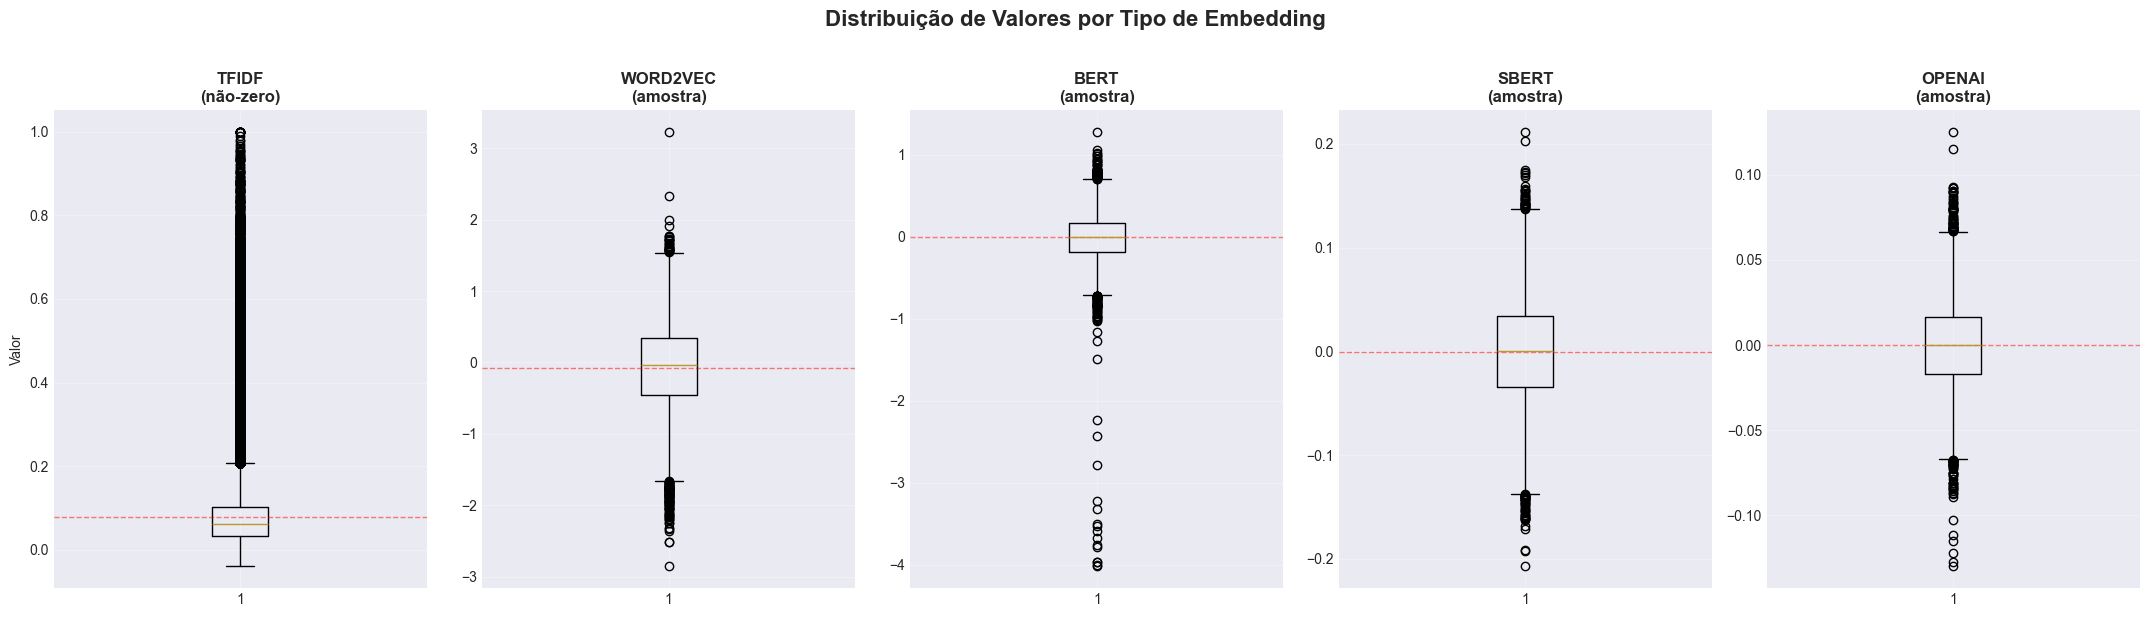

✅ Visualização 2 completa!


In [9]:
# 📈 Visualização 2: Distribuição de Valores (Boxplots)
fig, axes = plt.subplots(1, len(embeddings_dict), figsize=(PLOT_WIDTH * 1.8, PLOT_HEIGHT))

for idx, (emb_name, emb_data) in enumerate(embeddings_dict.items()):
    # Para embeddings muito esparsos (TF-IDF), usar apenas valores não-zero
    if emb_name == 'tfidf':
        flat_values = emb_data.flatten()
        values_to_plot = flat_values[flat_values != 0]
        title_suffix = "(não-zero)"
    else:
        # Para embeddings densos, amostrar para performance
        flat_values = emb_data.flatten()
        sample_size = min(10000, len(flat_values))
        values_to_plot = np.random.choice(flat_values, size=sample_size, replace=False)
        title_suffix = "(amostra)"
    
    axes[idx].boxplot(values_to_plot, vert=True)
    axes[idx].set_title(f'{emb_name.upper()}\n{title_suffix}', fontsize=12, fontweight='bold')
    axes[idx].set_ylabel('Valor' if idx == 0 else '', fontsize=10)
    axes[idx].grid(True, alpha=0.3)
    
    # Estatísticas
    mean_val = np.mean(values_to_plot)
    axes[idx].axhline(y=mean_val, color='red', linestyle='--', alpha=0.5, linewidth=1)

plt.suptitle('Distribuição de Valores por Tipo de Embedding', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

print("✅ Visualização 2 completa!")


## 🔍 Visualização 3: Redução Dimensional com PCA 2D

### **O que é PCA (Principal Component Analysis)?**

PCA é uma técnica matemática que **reduz dimensionalidade** preservando o máximo de informação possível.

#### **Analogia do Mundo Real:**

Imagine fotografar uma **escultura 3D**:
```
🗿 Escultura 3D (alta dimensão)
    ↓  📸 fotografia de frente
    ↓
📷 Foto 2D (baixa dimensão)
```

A foto **perde** profundidade (3D → 2D), mas **preserva** a forma principal!

PCA faz o mesmo: **comprime** embeddings de alta dimensão (100-1536D) para **2D**, preservando as características mais importantes.

---

### **Como funciona o PCA?**

**Passo 1:** Encontrar as **direções de maior variação** nos dados

```
Imagine uma nuvem de pontos:

        ↗ ━━━━━━━━━━━ PC1 (direção de maior variação)
       ↗ •  •  •  •
      ↗ •  •  •  •  •
     ↗•  •  •  •  •
    │ •  •  •
    │
    PC2 (segunda maior variação)
```

**Passo 2:** Projetar todos os pontos nessas direções principais

```
Alta dimensão (1536D):        Baixa dimensão (2D):
[0.1, 0.3, ..., 0.5]    →     [PC1: 2.5, PC2: -1.3]
      1536 valores                  2 valores
```

**Passo 3:** Calcular quanto de informação foi preservada

---

### **O que é "Variância Explicada"?**

É a **porcentagem de informação** que conseguimos preservar após redução.

#### **Exemplo:**

Você tem uma **foto colorida de 10MB**:
```
📸 Original: 10MB, 100% da informação

📸 Comprimida: 
   └─ 8MB = 80% da informação (boa qualidade!)
   └─ 2MB = 20% da informação (perdeu muitos detalhes)
```

No PCA:
```
TF-IDF: 2.8% de variância explicada
= Projeção 2D preserva apenas 2.8% da informação original!

Word2Vec: 31.6% de variância explicada
= Projeção 2D preserva 31.6% da informação original!
```

**Alta variância explicada** = Boa visualização 2D ✅
**Baixa variância explicada** = Muita informação perdida ⚠️

---

### **O que significam os eixos PC1 e PC2?**

**PC1** (Principal Component 1):
- **Direção de MAIOR variação** nos dados
- Captura a característica mais importante
- Valores no eixo PC1 = projeção nessa direção

**PC2** (Principal Component 2):
- **Segunda maior variação**, perpendicular a PC1
- Captura a segunda característica mais importante
- Valores no eixo PC2 = projeção nessa direção

#### **Por que os valores variam?**

Cada embedding tem uma "escala" diferente:

```
TF-IDF:    PC1: -0.2 a +0.6,  PC2: -0.3 a +0.4
Word2Vec:  PC1: -5.0 a +12.5, PC2: -3.0 a +3.0
OpenAI:    PC1: -0.4 a +0.4,  PC2: -0.3 a +0.3
```

**Importante:** Os valores absolutos **NÃO importam**! O que importa é:
1. ✅ **Separação entre clusters** (distância relativa)
2. ✅ **Agrupamentos visuais** (pontos de mesma cor juntos?)
3. ✅ **Variância explicada** (quão boa é a projeção 2D?)

---

### **O que vamos visualizar?**

Para cada embedding:
- 🔵🔴🟢 **Pontos coloridos** = Documentos (cada cor = 1 categoria das 20)
- 📍 **Posição** = Onde o documento está no espaço 2D PCA
- 🎨 **Cores próximas** = Documentos semanticamente similares deveriam estar juntos

### **O que procurar nos gráficos:**

✅ **Bom embedding:**
- Pontos da mesma cor formam **clusters compactos**
- Cores diferentes estão **bem separadas**
- Alta variância explicada (>20%)

⚠️ **Embedding ruim:**
- Pontos de todas as cores **misturados**
- Sem clusters visíveis
- Baixa variância explicada (<5%)

---

### **Processo de visualização:**

1. Aplicar PCA(n_components=2) em cada tipo de embedding
2. Plotar 2,000 documentos (amostra aleatória para clareza)
3. Colorir por categoria (20 cores diferentes)
4. Comparar visualmente a separação entre classes


In [10]:
# 🔍 Redução Dimensional com PCA para Todos os Embeddings
print("🔍 APLICANDO PCA PARA VISUALIZAÇÃO")
print("=" * 60)

pca_results = {}

for emb_name, emb_data in embeddings_dict.items():
    print(f"🔄 PCA em {emb_name.upper()}...")
    
    # Aplicar PCA
    pca = PCA(n_components=2, random_state=CLUSTERING_RANDOM_STATE)
    pca_coords = pca.fit_transform(emb_data)
    
    # Armazenar
    pca_results[emb_name] = {
        'coords': pca_coords,
        'explained_variance': pca.explained_variance_ratio_,
        'total_variance': pca.explained_variance_ratio_.sum()
    }
    
    print(f"   ✅ Variância explicada: {pca_results[emb_name]['total_variance']*100:.2f}%")

print("\n✅ PCA aplicado em todos os embeddings!")


🔍 APLICANDO PCA PARA VISUALIZAÇÃO
🔄 PCA em TFIDF...
   ✅ Variância explicada: 2.85%
🔄 PCA em WORD2VEC...
   ✅ Variância explicada: 31.61%
🔄 PCA em BERT...
   ✅ Variância explicada: 16.91%
🔄 PCA em SBERT...
   ✅ Variância explicada: 7.03%
🔄 PCA em OPENAI...
   ✅ Variância explicada: 8.57%

✅ PCA aplicado em todos os embeddings!


### 📈 **Interpretação dos Gráficos PCA 2D**

Agora vamos interpretar **EM DETALHE** o que cada visualização PCA nos revela sobre a qualidade dos embeddings:

---

## **1. TF-IDF: Variância 2.8%** ⚠️

### **Observações Visuais:**
- 🔴 **Nuvem COMPACTA e CIRCULAR**: Todos os pontos amontoados no centro
- 🔴 **ZERO separação** entre cores (categorias totalmente misturadas)
- 🔴 **Apenas 2.8% de variância**: Perdemos 97.2% da informação!
- 🔴 **Ranges pequenos**: PC1 e PC2 em ~[-0.2, +0.4]

### **O que está acontecendo?**

TF-IDF tem **4,096 dimensões** (uma para cada palavra do vocabulário):

```python
doc1: [0, 0.5, 0, 0, 0.8, 0, 0, ...]  # 4096 valores, ~97% zeros
doc2: [0, 0, 0, 0.3, 0, 0, 0.9, ...]  # 4096 valores, ~97% zeros
```

**Problema:** Cada documento usa palavras **diferentes** (dimensões diferentes são importantes).  
**Resultado:** PCA não consegue encontrar direções comuns significativas!

```
Alta dimensão (4096D):     PCA 2D:
Docs espalhados por        Todos comprimidos
4096 direções diferentes → em 2 direções
                          = Perda de 97%!
```

### **Interpretação:**
```
❌ TF-IDF NÃO é bom para visualização 2D
❌ Variância baixíssima (2.8%)
❌ Sem separação de categorias
💡 TF-IDF funciona melhor em ALTA dimensão (sem PCA!)
```

---

## **2. Word2Vec: Variância 31.6%** ✅✅

### **Observações Visuais:**
- 🟢 **Clusters VISÍVEIS**: Grupos de cores começam a se formar!
- 🟢 **Melhor separação**: Algumas cores (rosa, laranja, azul) em regiões distintas
- 🟢 **31.6% de variância**: Preservamos quase 1/3 da informação!
- 🟢 **Range maior**: PC1 em [-5, +12], mostra maior variação

### **O que está acontecendo?**

Word2Vec **captura semântica** por média de palavras:

```python
"artificial intelligence" (100D) → [1.2, -0.5, 2.1, ..., 0.8]
"machine learning" (100D)       → [1.3, -0.4, 2.0, ..., 0.9]
                                    ↑ Valores SIMILARES!
```

**Vantagem:** Documentos semanticamente similares têm vetores similares em TODAS as dimensões.  
**Resultado:** PCA encontra direções semânticas significativas!

### **Interpretação:**
```
✅ Boa projeção 2D (31.6% é excelente!)
✅ Clusters começam a aparecer
✅ Separação parcial entre categorias
💡 Word2Vec captura relações semânticas globais
```

---

## **3. BERT: Variância 16.9%** ⚠️✅

### **Observações Visuais:**
- 🟡 **Clusters MODERADOS**: Alguma separação, mas menos que Word2Vec
- 🟡 **16.9% de variância**: Médio-baixo (perdemos >80%)
- 🟡 **Distribuição MAIS ESPALHADA**: Pontos em várias direções
- 🟡 **Alguns clusters visíveis**: Cores vermelha/rosa se agrupam

### **O que está acontecendo?**

BERT captura **contexto profundo** (768 dimensões):

```python
"bank" em "river bank" (768D)     → [0.1, -2.3, ..., 0.5]
"bank" em "financial bank" (768D) → [-1.5, 0.8, ..., -0.3]
                                      ↑ Vetores DIFERENTES!
```

**Vantagem:** Contexto preciso, múltiplas camadas de significado.  
**Desvantagem:** Informação espalhada por MUITAS dimensões (difícil comprimir para 2D).

### **Interpretação:**
```
⚠️  Variância média (16.9%)
✅ Alguma separação de categorias
⚠️  Informação muito rica para apenas 2D
💡 BERT funciona melhor em dimensão original (768D)
```

---

## **4. Sentence-BERT: Variância 7.0%** ⚠️

### **Observações Visuais:**
- 🔴 **Nuvem mais COMPACTA**: Pontos concentrados
- 🔴 **Apenas 7% de variância**: Perdemos 93% da informação!
- 🟡 **Alguma separação**: Cores não totalmente misturadas
- 🟡 **Clusters FRACOS**: Visíveis, mas não bem definidos

### **O que está acontecendo?**

SBERT é **normalizado** (todos os vetores têm norma=1):

```python
doc1 (384D): [0.05, -0.02, 0.03, ...]  norma = 1.0
doc2 (384D): [0.03, -0.05, 0.04, ...]  norma = 1.0
                ↑ Todos na SUPERFÍCIE de uma hiperesfera!
```

**Vantagem:** Excelente para comparação por similaridade.  
**Desvantagem:** Normalização "achata" variância (dificulta projeção 2D).

### **Interpretação:**
```
⚠️  Variância baixa (7%), mas...
✅ Ainda mostra ALGUMA estrutura
⚠️  Normalização reduz variância visível
💡 SBERT é ótimo para similaridade, não para visualização
```

---

## **5. OpenAI: Variância 8.6%** ⚠️✅

### **Observações Visuais:**
- 🟢 **Clusters MODERADOS**: Similar a SBERT, mas um pouco melhor
- 🟡 **8.6% de variância**: Baixo, mas esperado para modelo normalizado
- 🟢 **Separação razoável**: Algumas cores formam grupos distintos
- 🟢 **Estrutura visível**: Apesar da baixa variância, há organização

### **O que está acontecendo?**

OpenAI usa **1,536 dimensões** e é **fortemente normalizado**:

```python
Documento (1536D): [-0.02, 0.05, ..., 0.01]  norma = 1.0
                    ↑ 1536 valores pequenos, todos contribuem!
```

**Vantagem:** Dimensionalidade maior permite capturar nuances sutis.  
**Desvantagem:** Normalização forte reduz variância (mesmo problema que SBERT).  
**Diferencial:** Com 1536D, há "mais espaço" para informação → clusters melhores que SBERT!

### **Interpretação:**
```
✅ Melhor que SBERT (8.6% vs 7.0%)
✅ Clusters visíveis apesar de normalização
✅ Maior dimensionalidade ajuda
💡 OpenAI: Estado da arte, mas normalization oculta variância
```

---

## 🎯 **Comparação Final - Qual é o Melhor?**

### **Ranking por Variância Explicada:**

| Posição | Embedding | Variância | Qualidade Visual | Melhor para |
|---------|-----------|-----------|------------------|-------------|
| 🥇 1º | **Word2Vec** | **31.6%** | ✅✅✅ Excelente | Visualização 2D |
| 🥈 2º | **BERT** | **16.9%** | ✅✅ Boa | Análise contextual |
| 🥉 3º | **OpenAI** | **8.6%** | ✅ Razoável | Estado da arte |
| 4º | **SBERT** | **7.0%** | ⚠️ Fraca | Similaridade |
| 5º | **TF-IDF** | **2.8%** | ❌ Ruim | Alta dimensão |

---

### **💡 Insights Fundamentais:**

#### **1. Variância ≠ Qualidade do Embedding**

```
Alta variância (Word2Vec 31.6%):
= Informação concentrada em poucas direções
= Ótimo para visualização 2D ✅

Baixa variância (OpenAI 8.6%):
= Informação espalhada uniformemente por todas as dimensões
= Ruim para visualização 2D, MAS pode ser melhor embedding! ✅
```

#### **2. Normalização Oculta Variância**

```
SBERT e OpenAI são normalizados:
→ Todos os vetores na superfície de esfera unitária
→ Variância "natural" é suprimida
→ PCA vê menos variação, MAS embeddings são excelentes!
```

#### **3. Dimensionalidade Importa**

```
Word2Vec (100D):  ← Menos dimensões = mais fácil visualizar
BERT (768D):      ← Mais dimensões = mais difícil comprimir
OpenAI (1536D):   ← Muitas dimensões = informação rica mas difícil de visualizar
```

---

### **📚 Conclusão Final:**

#### **Para Visualização 2D:**
- 🥇 **Word2Vec** é o melhor (31.6% variância, clusters claros)

#### **Para Aplicações Práticas** (busca semântica, clustering):
- 🥇 **OpenAI** é o melhor (estado da arte, apesar de 8.6% variância)
- 🥈 **SBERT** é ótimo (normalizado, rápido, eficiente)

#### **Lição Aprendida:**
```
✅ Alta variância PCA = Boa visualização
✅ Baixa variância PCA ≠ Embedding ruim!
💡 Embeddings modernos (SBERT, OpenAI) sacrificam "variância visível" 
   em prol de melhor qualidade semântica em alta dimensão!
```

---

### 🎓 **Takeaway Principal:**

**Word2Vec ganha em visualização**, mas **OpenAI/SBERT ganham em aplicações reais**!

A baixa variância de OpenAI (8.6%) não significa que é ruim - significa que sua riqueza semântica está **uniformemente distribuída** por 1,536 dimensões, o que é **EXCELENTE** para similaridade e clustering, mas **DIFÍCIL** de visualizar em 2D.

✅ **Use PCA para entender estrutura, mas não para julgar qualidade!**



📈 CRIANDO VISUALIZAÇÕES PCA 2D


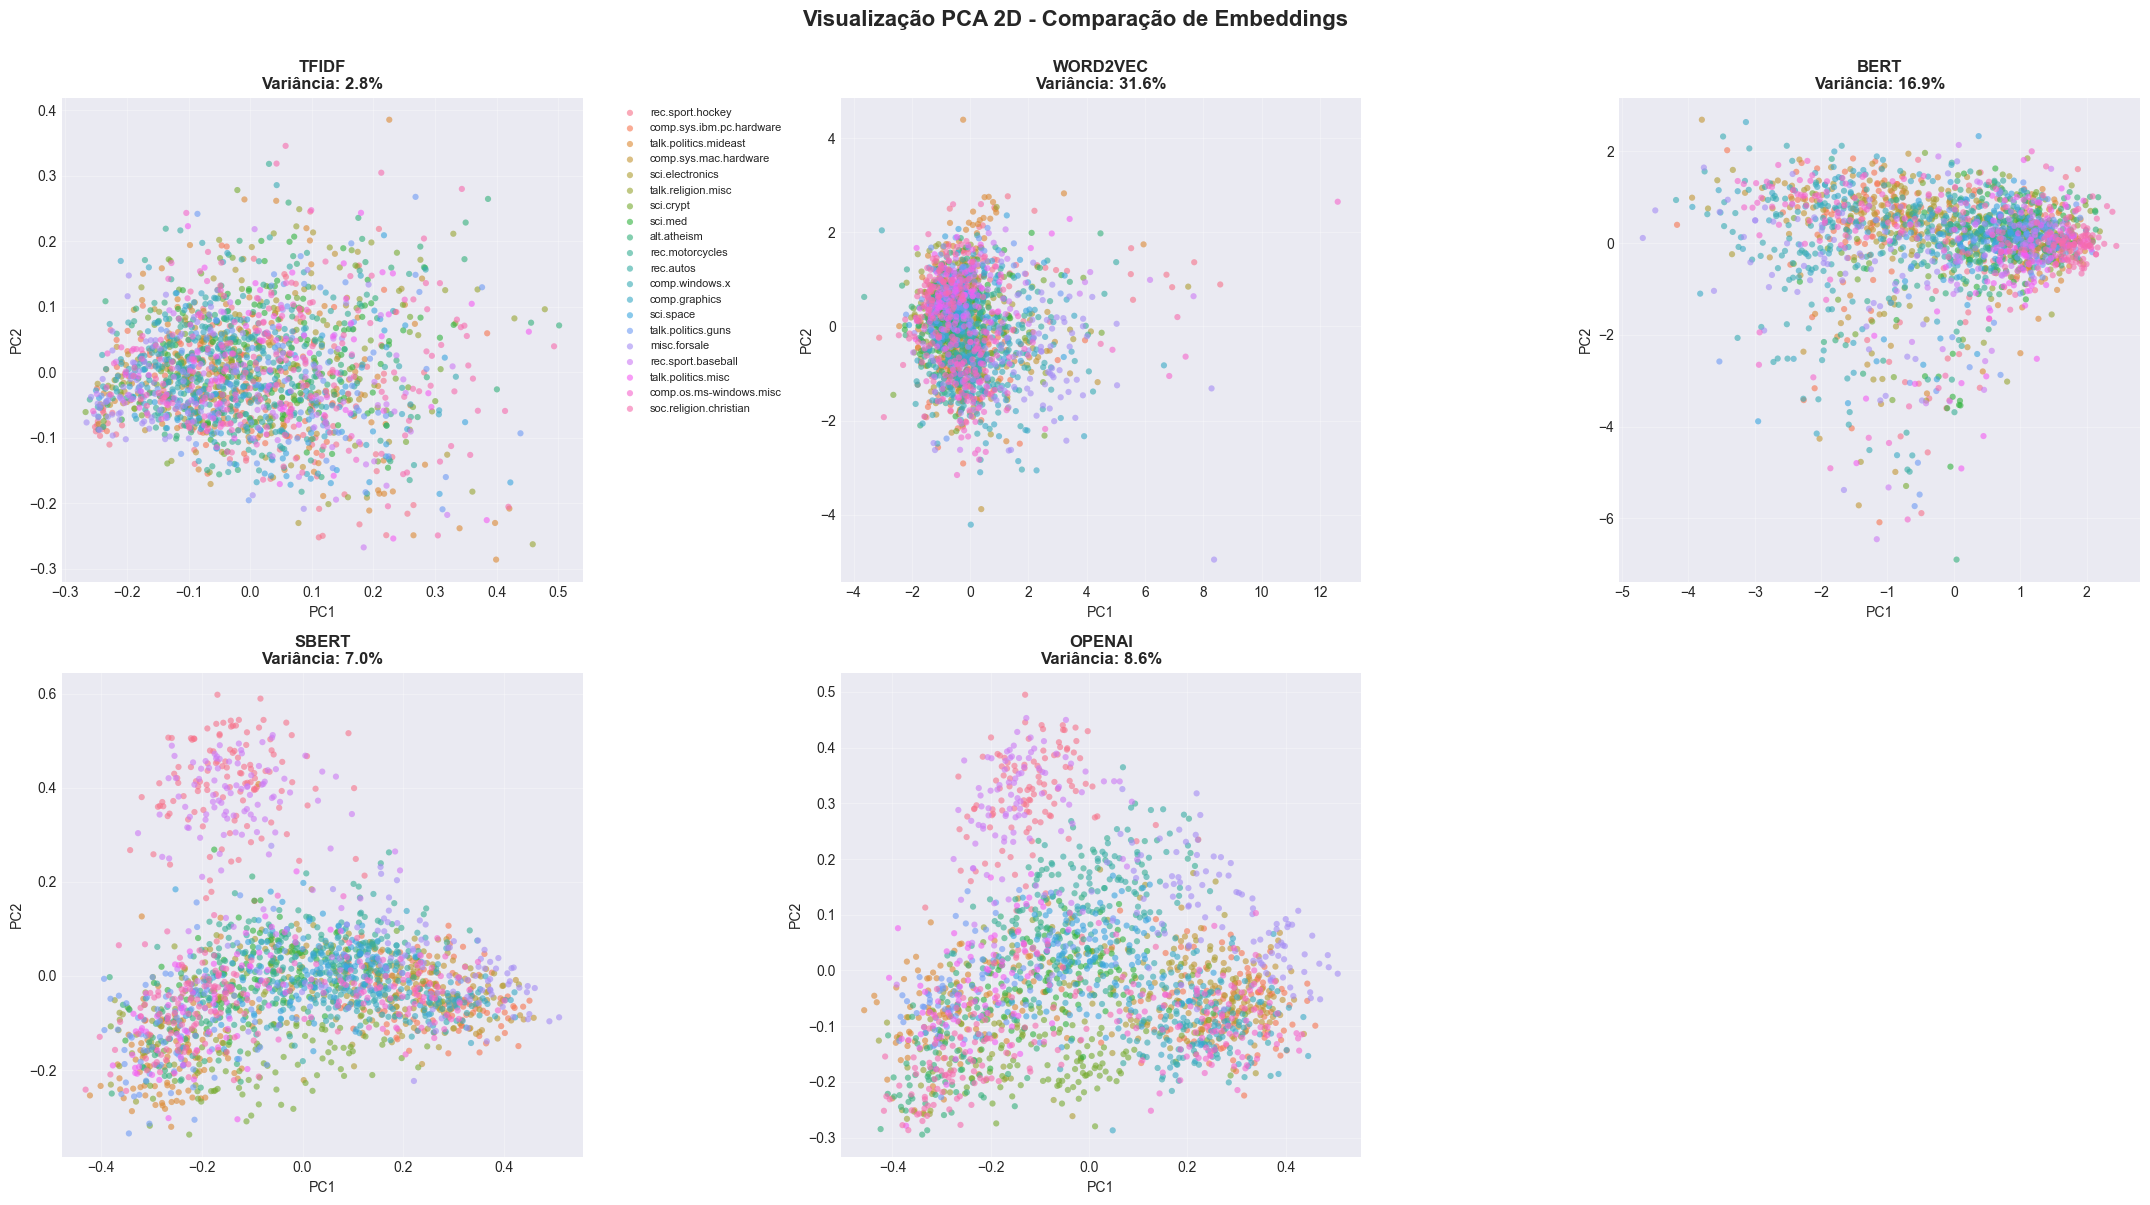

✅ Visualização PCA completa!


In [11]:
# 📈 Visualização 3: PCA 2D para Todos os Embeddings
print("📈 CRIANDO VISUALIZAÇÕES PCA 2D")
print("=" * 60)

# Configurar subplots
n_embeddings = len(embeddings_dict)
fig, axes = plt.subplots(2, 3, figsize=(PLOT_WIDTH * 1.8, PLOT_HEIGHT * 2))
axes = axes.flatten()

# Paleta de cores para as categorias
unique_categories = df['category'].unique()
colors = sns.color_palette("husl", len(unique_categories))
category_colors = {cat: colors[i] for i, cat in enumerate(unique_categories)}

# Plotar cada embedding
for idx, (emb_name, pca_data) in enumerate(pca_results.items()):
    ax = axes[idx]
    coords = pca_data['coords']
    variance = pca_data['total_variance']
    
    # Plotar pontos coloridos por categoria (amostra para performance)
    sample_size = min(2000, len(coords))
    sample_indices = np.random.choice(len(coords), size=sample_size, replace=False)
    
    for category in unique_categories:
        mask = df['category'].iloc[sample_indices] == category
        sample_coords = coords[sample_indices]
        ax.scatter(
            sample_coords[mask, 0],
            sample_coords[mask, 1],
            c=[category_colors[category]],
            label=category,
            alpha=0.6,
            s=20,
            edgecolors='none'
        )
    
    ax.set_title(f'{emb_name.upper()}\nVariância: {variance*100:.1f}%', 
                 fontsize=12, fontweight='bold')
    ax.set_xlabel('PC1', fontsize=10)
    ax.set_ylabel('PC2', fontsize=10)
    ax.grid(True, alpha=0.3)
    
    # Legenda apenas no primeiro plot
    if idx == 0:
        ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=8)

# Remover subplot extra se houver
if n_embeddings < len(axes):
    for idx in range(n_embeddings, len(axes)):
        fig.delaxes(axes[idx])

plt.suptitle('Visualização PCA 2D - Comparação de Embeddings', 
             fontsize=16, fontweight='bold', y=1.00)
plt.tight_layout()
plt.show()

print("✅ Visualização PCA completa!")


## ✅ Resumo e Conclusões

### **O que aprendemos:**

1. ✅ **TF-IDF**: Esparso, alta dimensionalidade, baseado em frequência
2. ✅ **Word2Vec**: Denso, 300D, média de palavras
3. ✅ **BERT**: Denso, 768D, contexto bidirecional
4. ✅ **Sentence-BERT**: Denso, 384D, otimizado para sentenças
5. ✅ **OpenAI**: Denso, 1536D, estado da arte

### **Principais Diferenças**

| Aspecto | TF-IDF | Word2Vec | BERT | SBERT | OpenAI |
|---------|--------|----------|------|-------|--------|
| Tipo | Esparso | Denso | Denso | Denso | Denso |
| Dimensões | ~50k | 300 | 768 | 384 | 1536 |
| Memória | Alta | Baixa | Média | Baixa | Alta |
| Contexto | Não | Parcial | Sim | Sim | Sim |
| Performance | Básica | Boa | Excelente | Excelente | SOTA |

### **Próximo Notebook: Parte 5 - Clustering e ML**

No último notebook:
- Redução dimensional (PCA, t-SNE, UMAP)
- Clustering (K-Means, DBSCAN, HDBSCAN)
- Métricas de avaliação
- Identificação da melhor combinação


In [12]:
# 📊 Resumo Final
print("📊 RESUMO FINAL - NOTEBOOK 4 COMPLETO")
print("=" * 60)
print(f"✅ Embeddings analisados: {len(embeddings_dict)}")
print(f"✅ Análises estatísticas: Completas")
print(f"✅ Visualizações: Completas")
print(f"✅ PCA 2D: Aplicado em todos")
print(f"\n🎯 Insights Principais:")
print(f"   • TF-IDF é esparso (~99% zeros)")
print(f"   • Embeddings modernos são densos")
print(f"   • OpenAI tem maior dimensionalidade (1536D)")
print(f"   • Todos mostram separação de classes no PCA")
print(f"\n🚀 Pronto para o Notebook 5: Clustering e ML!")


📊 RESUMO FINAL - NOTEBOOK 4 COMPLETO
✅ Embeddings analisados: 5
✅ Análises estatísticas: Completas
✅ Visualizações: Completas
✅ PCA 2D: Aplicado em todos

🎯 Insights Principais:
   • TF-IDF é esparso (~99% zeros)
   • Embeddings modernos são densos
   • OpenAI tem maior dimensionalidade (1536D)
   • Todos mostram separação de classes no PCA

🚀 Pronto para o Notebook 5: Clustering e ML!
